## Regression Data Exploration Report 


The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models).

Description:https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars 

Source of data: https://gist.github.com/seankross/a412dfbd88b3db70b74b

Key:
mpg - Mileage

cyl - # of cylinders

disp - displacement, in cubic inches

hp - horsepower

drat - driveshaft ratio 

wt - weight

qsec - 1/4 mile time; a measure of acceleration

vs - 'V' or straight - engine shape

am - transmission; auto or manual

gear - # of gears

carb - # of carburetors.


### Importing Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
sns.set(color_codes=True)
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
df = pd.read_csv('../Intro to DS - Assignment 2/datasets/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

## Section 1:
Dependant: Mileage of the Car - mpg

Independent: Weight of the Car - wt

When buying a car, we first need to look at the car's mileage. As we know, the car's mileage affects the value, price and we need to factor in maintenance price. 
When it comes to the mileage, many factors need to be considered, such as engine quality, transmission, tire wear and tear, and most importantly, the car's weight. 

Explanation: https://www.bankofamerica.com/auto-loans/what-to-know-when-buying-car/

Lets explore the relationship between the weight of the car and the mileage of the car.

In [4]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
#Summary
df[['mpg', 'wt']].describe()

,mpg,wt
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


The average mileage of all 32 cars in the dataset is 20.090625 miles, as indicated by the mean value in the mpg column.

The average weight of all 32 cars in the dataset is 3217.250, as indicated by the mean value in the wt column.

The minimum mileage of cars ranges from 10.40 miles to 32 miles, as indicated in the Min and Max values in the mpg column. 

The minimum weight of cars ranges from 1513 lbs to 5424 lbs, as indicated in the Min and Max values in the weight column.

Explanation: https://www.w3resource.com/pandas/dataframe/dataframe-describe.php#:~:text=The%20describe()%20function%20is,dataset's%20distribution%2C%20excluding%20NaN%20values.

Explanation:https://www.w3schools.com/python/pandas/ref_df_describe.asp (How to read the values)

## Section 2:

Describe how they relate to each other (include a plot)
Are they correlated? How? Can we draw any conclusions from this?

In [5]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing, linear_model, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

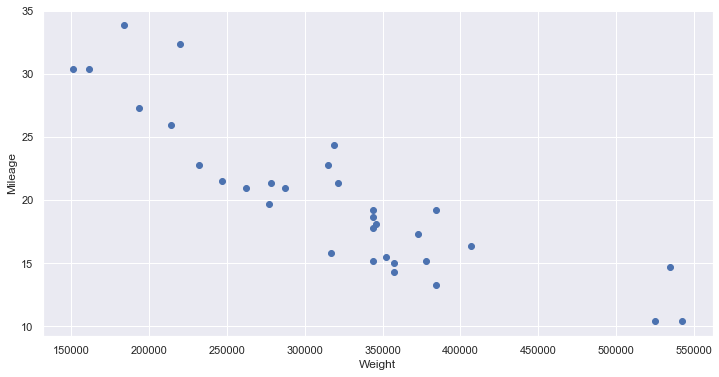

In [6]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
#Scatter plot of mpg and wt 
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["wt","mpg"]].values
x = data[:,0]*100000
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Weight",'Mileage')

The weight of cars along the x-axis and the mileage along the y-axis. This shows us a negative correlation between the weight and mileage of cars.


Explanation: https://www.ck12.org/statistics/scatter-plots/lesson/Scatter-Plots-MSM7/ (Negative correlation would mean that as one variable increases, the second variable decreases. Negative correlation corresponds to points that move down as you go from left to right on your scatter plot.)

In [17]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb (stats.pearsonr()section)
#Correlate
from scipy import stats
r, p = stats.pearsonr(x,y)
r

-0.867659376517228

The Pearson's correlation coefficient can be denoted as 'r'. Pearson's correlation coefficient value is -0.868.
-0.86 is close to -1 hence close to perfect negative correlation.

Explanation: A negative correlation can indicate a strong relationship or a weak relationship. Many people think that a correlation of –1 indicates no relationship. But the opposite is true. A correlation of -1 indicates a near perfect relationship along a straight line, which is the strongest relationship possible. The minus sign simply indicates that the line slopes downwards, and it is a negative relationship.

https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp

https://www.investopedia.com/ask/answers/041015/what-does-negative-correlation-coefficient-mean.asp

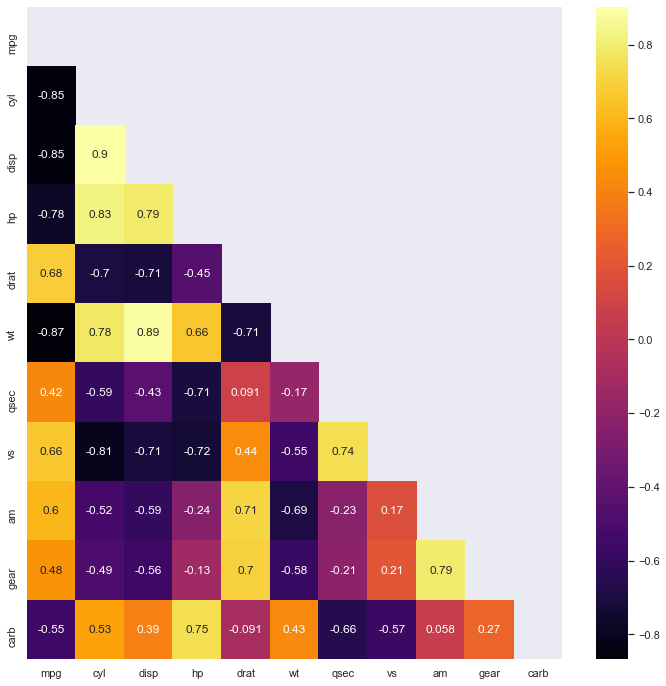

In [7]:
#http://www.gnuplotting.org/matplotlib-colormaps/
#https://medium.com/@gio.amorim/data-exploration-for-regression-analysis-821ee0bfc724
# Visualizing the data using heatmap
corr = df.corr()
# we can create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# generate heatmap
plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, center=0, mask=mask, cmap='inferno')
plt.show()

## Section 3: 


Fit a simple linear model

Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?

Evaluate your model. How good is the fit?

Our simple linear regression model will weigh the car as an independent variable and the car's mileage as a dependent variable.

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
x = df[['wt']]
y = df[['mpg']]
#Split for training
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [12]:
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#https://www.datacamp.com/blog/scikit-learn-cheat-sheet-python-machine-learning
y_pred_lr   = LR.predict(x_test)

print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_pred_lr))
print("Explained Variance Score",metrics.explained_variance_score(y_test,y_pred_lr))
print("R2",metrics.r2_score(y_test,y_pred_lr))

Mean Squared Error: 12.475985659918825
Explained Variance Score 0.7427036523571753
R2 0.6879761857596275


R-squared = 0.6879 = 68.79%. A higher r-squared value indicates a better fit for the model.

Explanation: The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

When we compare the R2 Score with the Explained Variance Score, we are basically checking the Mean Error; so if R2 = Explained Variance Score, that means: The Mean Error = Zero!

Explanation: https://statisticsbyjim.com/basics/correlations/

Explanation: We use the r 2 (r squared), otherwise known as the coefficient of determination to evaluate the fit of our model. This tells us how much of the variation in the dependent variable (y) is explained by the model.

https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb

https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-varian#:~:text=When%20we%20compare%20the%20R,%3A%20The%20Mean%20Error%20%3D%20Zero!

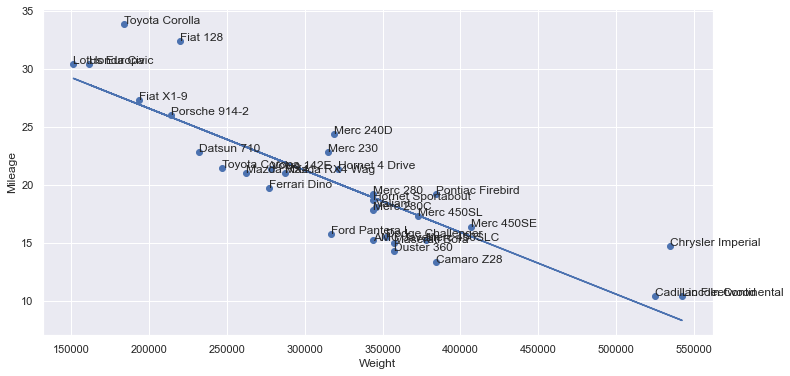

In [27]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb

data = df[["wt","mpg"]].values
x = data[:,0]*100000
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Weight",'Mileage')
ax.plot(x, model_y)

## Section 4: 


Pick (at least one, perhaps many) extra independent variables and fit a multiple regression model
Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?

The number of cylinders in the car will be our extra variable.

Explanation: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/multiple-regression/interpret-the-results/key-results/

In [28]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%204/intro-to-ds-week-4.ipynb
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
cars_df = pd.read_csv("../Intro to DS - Assignment 2/datasets/mtcars.csv") 
x = cars_df[['cyl', 'wt', 'vs']]
y = cars_df['mpg']
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y))

[-1.3641033  -3.24636733  0.52417214] 38.746064150586236 0.8308543145039776


From the above multiple regression, we can make the following predictions(Left to Right)

1. Number of cylinders = -1.3641 suggests that the car's mileage will decrease.


2. Weight = -3.2464


3. Car's mileage = 38.7461 


5. R-squared = 0.830 = 83%, suggests that the car's weight can explain the 83% variation in the car's mileage, the number of cylinders in the car, and the engine shape. 

Based on all the information above, we can make some possible predictions, such as the length of the warranty.

Explanation:
https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

https://www.investopedia.com/terms/m/mlr.asp

https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a

https://towardsdatascience.com/car-selection-and-sales-day-prediction-8c4a474f9dca

# Section 5:

What ethical issues may arise from using these models to make predictions?


The reporting made from the above report is all part of the process known as extrapolation.
Extrapolation is a process that uses the regression line to predict a point whose x-value is outside the range of x-values of training data. We have predicted the car's mileage based on its weight without factoring that its weight can be outside the given range.

Other ethical issues that may arise from using these models to predict car value could be if the information is provided to a third party, affecting decision-making regarding leasing vehicles to specific areas/locations.

What extra data (more variables, better variables) would improve your current models, or allow you to make better, different models?

There are more other variables that we can also consider that might affect the mileage of the car, such as the number of passengers in an average week, the average speed, traffic conditions of the road, weather conditions and and tire quality. 
Moreover, as always, working with a larger dataset would make for a better regression report.